# Grouping

Split-apply-combine strategy and `groupby()` function

In [1]:
import numpy as np
import pandas as pd

# Load Palmer penguins data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Summary statisitcs 

It is easy to get summary stats for each column in a df using:

- `sum()`: sum values in each column,
- `count()`: count non-NA values in each column,
- `min()` and `max()`: get the minimum and maximum value in each column,
- `mean()` and `median()`: get the mean and median value in each column,
- `std()` and `var()`: get the standard deviation and variance in each column.

### Example

In [2]:
# Get the number of non-NA values in each column
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

In [3]:
# Get minimum value in each column with numerical values
penguins.select_dtypes('number').min()

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## Grouping

Often, we want to calculate a statistic for each group

### Split-Apply-Combine strategy

1. **Split**: split the data into logical groups (species, island, etc.)

2. **Apply**: calculate some summary stat on each group (average flipper length by species, body mass by sex, etc)

3. **Combine**: combine the stat calculated on each block group together

For pandas.DataFrame or Series, use groupby() method to split

```
df.groupby(columns_to_group_by).summary_method()
```

### Example

In [4]:
# Without using group_by: get avg of all values in the column
penguins['flipper_length_mm'].mean()

200.91520467836258

In [5]:
# GroupBy object- intermediate step
penguins.groupby('species')['flipper_length_mm']

In [6]:
# Average flipper length per species
penguins.groupby('species')['flipper_length_mm'].mean()

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

Start with penguins df, groupby() species values, then select flipper_length_mm column to calculate mean() of this column with respect to the groups

In [7]:
# Average flipper length per species
avg_flipper = (penguins.groupby("species")
                        .flipper_length_mm
                        .mean()
                        .rename('mean_flipper_length')
                        .sort_values(ascending=False)
                        )
avg_flipper

species
Gentoo       217.186992
Chinstrap    195.823529
Adelie       189.953642
Name: mean_flipper_length, dtype: float64

In [8]:
# Group by combinations of columns
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

In [9]:
# Count of non-NA values for each column across each combination of island and year
penguins.groupby(['island', 'year']).count()

species  bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    year                                                              
Biscoe    2007       44              44             44                 44   
          2008       64              64             64                 64   
          2009       60              59             59                 59   
Dream     2007       46              46             46                 46   
          2008       34              34             34                 34   
          2009       44              44             44                 44   
Torgersen 2007       20              19             19                 19   
          2008       16              16             16                 16   
          2009       16              16             16                 16   

                body_mass_g  sex  
island    year                    
Biscoe    2007           44   43  
          2008           64   63  
          2009           59   57  
Dream     2007           46   45  
          2008           34   34  
          2009           44   44  
Torgersen 2007           19   15  
          2008           16   16  
          2009           16   16

<Axes: title={'center': 'Penguins surveyed at the Palmer Archipelago'}, ylabel='(Island, Year)'>

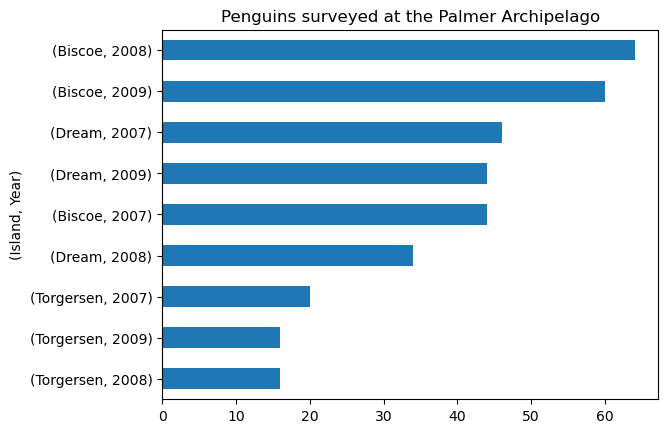

In [10]:
# Plot surveyed population per year and island using method chaining
# only plot species and sort 

(penguins.groupby(['island', 'year'])
          .count()
          .species
          .sort_values()
          .plot(kind = 'barh',
               title = 'Penguins surveyed at the Palmer Archipelago',
               ylabel = ('Island', 'Year')))

### Check-in: 

- Use `max()` method to calculate maximum value of a penguin's body mass by year and species

- Use to display highest body masses per year and species as a bar plot in descending order

<Axes: title={'center': 'Maximum Penguin Body Mass Per Species Per Year'}, xlabel='Body Mass (g)', ylabel='Year, Species'>

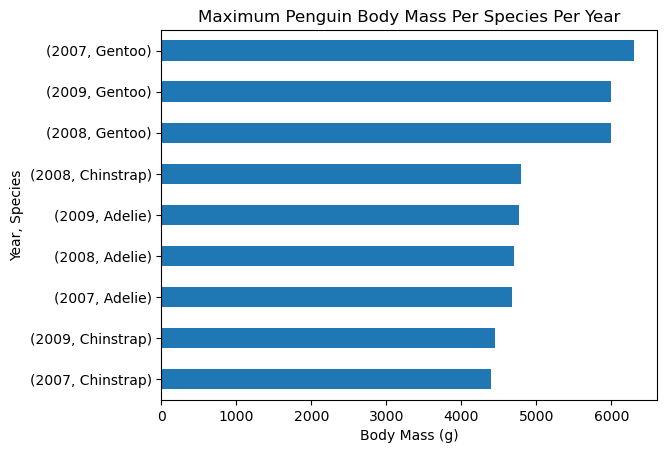

In [18]:
(penguins.groupby(['year', 'species'])
         .body_mass_g
         .max()
         .sort_values()
         .plot(kind = 'barh',
               title = "Maximum Penguin Body Mass Per Species Per Year",
               ylabel = ("Year, Species"),
               xlabel = ("Body Mass (g)")))

### Lesson Summary